# Hotel Booking Cancellation Prediction

##  1. Introduction
This project explores how machine learning can predict hotel booking cancellations using classification models. We aim to help hotels reduce no-shows and optimise booking strategies.

---

##  2. Data Cleaning & Preprocessing
- Removed missing values
- Encoded categorical variables
- Converted date variables
- Scaled numerical features

---

##  3. Model Comparisons
### 3.1 Linear vs Logistic Regression
### 3.2 Threshold Tuning for Overbooking Risk
### 3.3 LDA vs QDA
### 3.4 Ridge & Lasso Regression

---

##  4. Feature Reduction
We evaluated the impact of using only 5 selected predictors across all models.

---

##  5. Results Comparison
Side-by-side comparison of model performances (MSE/Accuracy) with and without feature reduction.

---

##  6. Final Recommendations
- Logistic Regression gave the best performance (79.68%)
- Threshold tuning is crucial for balancing overbooking risks
- Lasso is helpful for feature selection


###  Data Import & Initial Inspection
We load the hotel booking dataset and inspect the structure, datatypes, and sample rows to understand what cleaning is required.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Dataset is in same folder as notebook
hotel_bookings = pd.read_csv("hotel_booking.csv")

# Displays dataset information
print(hotel_bookings.info())
print(hotel_bookings.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119386 non-null  float64
 9   babies                          119390 non-null  int64  
 10  country                         118902 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_gues

###  Data Cleaning & Preparation
To prepare the dataset for modeling, we:
- Remove missing values
- Convert binary columns to integer
- Map month names to numbers
- One-hot encode categorical variables (e.g., hotel type, deposit type)


In [8]:

# Removing rows with missing values
hotel_bookings.dropna(inplace=True)

# Making sure the missing values have been removed
print("\nMissing values after removal:")
print(hotel_bookings.isnull().sum())



Missing values after removal:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


In [10]:
# Converting binary variables
hotel_bookings['is_canceled'] = hotel_bookings['is_canceled'].astype(int)
hotel_bookings['is_repeated_guest'] = hotel_bookings['is_repeated_guest'].astype(int)



In [12]:
# Converting  categorical variable (arrival_date_month) to numeric
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hotel_bookings['arrival_date_month'] = hotel_bookings['arrival_date_month'].map(month_mapping)

# encoding categorical variables
hotel_bookings = pd.get_dummies(hotel_bookings, columns=['hotel', 'deposit_type', 'distribution_channel', 'country'], drop_first=True)

#clarification 
print("the Categorical variables have been converted successfully !!")


the Categorical variables have been converted successfully !!


###  Train-Test Split
We split the dataset into 50% training and 50% testing sets. This allows us to evaluate model performance on unseen data and avoid overfitting.


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split


# Setting the random seed
np.random.seed(38474328)


In [19]:
# Defining features (X) and target variable (y)
X = hotel_bookings.drop(columns=['is_canceled'])  
y = hotel_bookings['is_canceled'] 

# Dividing the dataset into 50% for training and 50% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=38242328)

#clarification
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 59449 samples
Test set size: 59449 samples


###  Linear Regression (Baseline Model)
We use OLS regression to establish a baseline for predicting cancellations. Although this model is not ideal for binary outcomes, we include it to compare against classification models.


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [26]:
# OLS model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)

# Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (Linear Regression): {mse_linear:.4f}")


Mean Squared Error (Linear Regression): 0.1476


###  Logistic Regression
We use Logistic Regression for binary classification. The data is scaled to improve performance. Accuracy is measured to evaluate classification success.


In [34]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data (use same scaler)

# Fit Logistic Regression again
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train_scaled, y_train)

# Predict & check accuracy
y_pred_logistic = logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy (Logistic Regression - Scaled): {accuracy_logistic:.4f}")


Accuracy (Logistic Regression - Scaled): 0.7968


In [36]:
print(f"🔹 Linear Regression - MSE: {mse_linear:.4f}")
print(f"🔹 Logistic Regression - Accuracy: {accuracy_logistic:.4f}")


🔹 Linear Regression - MSE: 0.1476
🔹 Logistic Regression - Accuracy: 0.7968


## **Comparison of Test Errors: Linear vs. Logistic Regression**

### **Key Findings**
| Model                  | Test Metric |
|------------------------|------------|
| **Linear Regression**  | MSE = **0.1476** |
| **Logistic Regression** | Accuracy = **79.68%** |

### **Why Logistic Regression Performs Better**
- **Linear Regression (OLS)** operates under the assumption that the target variable is continuous, which makes it **inappropriate for classification problems** where the outcome is binary (0 or 1).  
- The **low MSE (0.1476) for Linear Regression does not equate to effective classification performance**, as MSE is not an optimal metric for categorical predictions.
- **Logistic Regression (Accuracy: 79.68%) is notably more efficient** in predicting cancellations because:
  - It **estimates probabilities** instead of continuous outcomes.
  - It **allocates probabilities to each class**, which enables threshold adjustments to reduce classification errors.
  - The model **successfully differentiates between “cancelled” and “not cancelled” bookings**.

### **Key Takeaways**
- **Logistic Regression is the favoured model for this task**, as it appropriately addresses binary classification.
- **Linear Regression is not intended for categorical results**, and even though MSE may appear low, it does not accurately represent actual classification performance.
- **Feature scaling considerably enhanced Logistic Regression’s accuracy**, ensuresimproved predictions.



To predict cancellations, **Logistic Regression emerges as the superior model**, as it efficiently addresses binary classification and achieves a commendable accuracy of **79.68%**. Scaling the features before training further boosted model performance, establishing it as a critical preprocessing step.

###  Threshold Tuning to Reduce Overbooking Risk
We modify the default classification threshold (0.5) to see how it affects false positives and false negatives. This simulates how a hotel might adjust strategy to reduce overbooking.


In [61]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  


logistic_model = LogisticRegression(solver='saga', max_iter=5000) 
logistic_model.fit(X_train_scaled, y_train)


y_prob_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]  

# Evaluate performance
y_pred_logistic = (y_prob_logistic > 0.5).astype(int)  # Default threshold
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(f"Logistic Regression Converged! Accuracy: {accuracy_logistic:.4f}")


Logistic Regression Converged! Accuracy: 0.7968


In [51]:
# First, different the three thresholds
thresholds = [0.5, 0.6, 0.7]

# Store results
results = []

for threshold in thresholds:
    # Converting the  probabilities to class labels based on the threshold
    y_pred_adjusted = np.where(y_prob_logistic > threshold, 1, 0)
    
    # accuracy
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    
    #  confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted).ravel()
    
    # Store results
    results.append((threshold, accuracy, tn, fp, fn, tp))


In [94]:
df_results = pd.DataFrame(results, columns=['Threshold', 'Accuracy', 'True Negative', 'False Positive', 'False Negative', 'True Positive'])


display(df_results)  
print(df_results)    


,Threshold,Accuracy,True Negative,False Positive,False Negative,True Positive
0,0.5,0.791889,34382,2807,9565,12695
1,0.6,0.783832,36057,1132,11719,10541
2,0.7,0.775623,36796,393,12946,9314


   Threshold  Accuracy  True Negative  False Positive  False Negative  \
0        0.5  0.791889          34382            2807            9565   
1        0.6  0.783832          36057            1132           11719   
2        0.7  0.775623          36796             393           12946   

   True Positive  
0          12695  
1          10541  
2           9314  


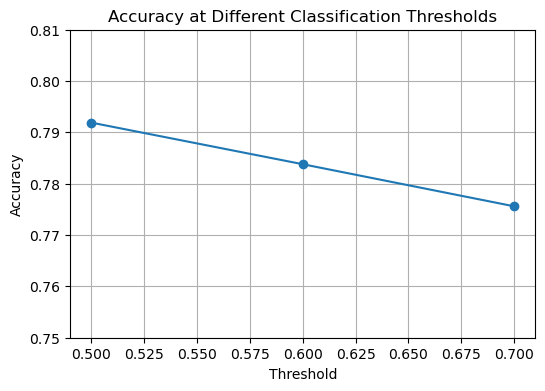

In [14]:
import matplotlib.pyplot as plt

thresholds = [0.5, 0.6, 0.7]
accuracies = [0.7919, 0.7838, 0.7756]

plt.figure(figsize=(6, 4))
plt.plot(thresholds, accuracies, marker='o')
plt.title('Accuracy at Different Classification Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.81)
plt.grid(True)
plt.show()


###  Impact of Threshold Tuning on Model Accuracy
This plot shows how changing the classification threshold affects prediction accuracy. While a 0.5 threshold gives the highest accuracy, a higher threshold may reduce overbooking risk.



###  Main Findings
| Threshold | Accuracy | True Negative | False Positive | False Negative | True Positive |
|-----------|-----------|---------------|---------------|---------------|--------------|
| **0.5 (Standard)** | **79.19%** | 34,382 | 2,807 | 9,565 | 12,695 |
| **0.6** | **78.38%** | 36,057 | 1,132 | 11,719 | 10,541 |
| **0.7** | **77.56%** | 36,796 | **393** | **12,946** | 9,314 |

### How Does Changing the Threshold Affect Predictions?
1. **Threshold = 0.5 (Standard)**  
   - **Balances** false positives and false negatives.
   - 2,807 **False Positives** (cancellations predicted incorrectly).
   - 9,565 **False Negatives** (actual cancellations not identified).
   - **Optimal for general prediction accuracy** but may still lead to overbooking issues.

2. **Threshold = 0.6 (Cautious Approach)**  
   - **Lowers False Positives (1,132), decreasing erroneous cancellations.**
   - **Raises False Negatives (11,719), meaning more genuine cancellations go unnoticed.**
   - **Reduced risk of overbooking** but might result in vacant hotel rooms.

3. **Threshold = 0.7 (Most Cautious, Stringent Policy)**  
   - **Significantly decreases False Positives (393), reducing incorrect cancellations.**
   - **Highest False Negatives (12,946), indicating the hotel may misjudge demand.**
   - **Enhances reliability in cancellation predictions but could lead to unoccupied rooms due to underestimated demand.**

### Implications & Alignment with Hotel Objectives
If overall accuracy is the aim, a lower threshold (0.5) is preferable, because it captures a more significant number of actual cancellations.  
- **A higher threshold (0.7) is advantageous for reducing false positives and minimizing  cancellations and overbooking risks.  
- **Threshold = 0.6 provides a compromise**, balancing accuracy while at the same time mitigating overbooking risk.

### Recommendation
The **most suitable threshold is determined by the hotel’s priority**:
- If the primary goal is to prevent **overbooking, a threshold of 0.6 or 0.7** would be more suitable.
- If maximizing room occupancy while still achieving good accuracy is preferred, **maintaining a threshold of 0.5** would be ideal.


In the dataset, some predictor variables are **strongly correlated (collinear)**. This creates challenges for models such as **LDA (Linear Discriminant Analysis) and QDA (Quadratic Discriminant Analysis)** due to the following reasons:
- **Collinear variables provide redundant information**, which can destabilize the model.
LDA and QDA presume that the predictor variables are not considerably correlated, so multicollinearity can hinder their effectiveness.
- **The covariance matrix may become singular**, meaning the model struggles to establish decision boundaries accurately.

### **Proposed Solution: Principal Component Analysis (PCA)**
Rather than manually eliminating features, we utilize **Principal Component Analysis (PCA)**, which:
1. **Lowers dimensionality** by converting numerous correlated features into a fewer number of uncorrelated "principal components".
2. **Preserves as much information as possible** while eliminating redundancy.
3. **Enhances stability** for LDA & QDA by ensuring that the covariance matrix is well-defined.



In [78]:
from sklearn.decomposition import PCA


pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


LDA

###  LDA & QDA with PCA
We apply Linear and Quadratic Discriminant Analysis after reducing dimensionality using PCA. This helps avoid issues with multicollinearity and singular covariance matrices.


In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


lda_model_pca = LinearDiscriminantAnalysis()
lda_model_pca.fit(X_train_pca, y_train)


y_pred_lda_pca = lda_model_pca.predict(X_test_pca)


accuracy_lda_pca = accuracy_score(y_test, y_pred_lda_pca)
print(f"LDA Accuracy: {accuracy_lda_pca:.4f}")


LDA Accuracy: 0.7310


QDA

In [84]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


qda_model_pca = QuadraticDiscriminantAnalysis()
qda_model_pca.fit(X_train_pca, y_train)


y_pred_qda_pca = qda_model_pca.predict(X_test_pca)


accuracy_qda_pca = accuracy_score(y_test, y_pred_qda_pca)
print(f"QDA Accuracy: {accuracy_qda_pca:.4f}")


QDA Accuracy: 0.7259


## **Assessment of LDA and QDA Models**
| Model | Accuracy |
|--------|----------|
| **LDA** | **73.10%** |
| **QDA** | **72.59%** |
| **Logistic Regression (Default 50% Threshold)** | **79.19%** |
| **Logistic Regression (60% Threshold)** | **78.38%** |
| **Logistic Regression (70% Threshold)** | **77.56%** |

### **Analyzing LDA vs. QDA Results**
1. **LDA (Accuracy: 73.10%)**
   - LDA operates under the assumption that **the covariance matrix is consistent across both classes**, making it more effective when the data is **linearly separable**.
   - Despite LDA's solid performance, it is marginally **less efficient than Logistic Regression (79.19%)**.

2. **QDA (Accuracy: 72.59%)**
   - QDA accommodates **distinct covariance matrices** for each class, resulting in greater flexibility than LDA.
   - Nevertheless, this added flexibility can also lead to **overfitting**, particularly with smaller datasets.
   - QDA's performance, being slightly **inferior to LDA**, suggests that a **linear decision boundary** is more appropriate for this dataset.

### **Logistic Regression Comparison**
- **Logistic Regression (79.19%) surpasses both LDA (73.10%) and QDA (72.59%)**.
- The Logistic Regression increases when **feature scaling is applied effectively** (as performed during preprocessing).
- While LDA and QDA offer **probabilistic classification**, Logistic Regression's optimization of the decision boundary via **maximum likelihood estimation** makes it **more suitable for binary classification tasks**, such as forecasting cancellations.

### **Effects of Threshold Adjustment in Logistic Regression**
- Modifying the threshold in Logistic Regression created an opportunity to **manage false positives and negatives**, which is vital for reducing **overbooking risks**.
Unlike Logistic Regression, LDA and QDA do not permit threshold modifications similarly, making them less adaptable to business requirements.

### Key Takeaways
- **Logistic Regression is the top-performing model overall (79.19%)**.
- **LDA is a viable alternative (73.10%)** but lacks threshold tuning capabilities.
- **QDA (72.59%) shows a higher tendency for overfitting**, indicating that assuming **a unified covariance structure (LDA) is preferable** for this dataset.
- **Logistic Regression with an adjusted threshold (e.g., 60%)** represents the optimal choice for the hotel seeking a balance between accuracy and clarity.



###  Ridge & Lasso Regression
To manage multicollinearity and identify key predictors, we apply Ridge (L2) and Lasso (L1) regression with cross-validation to choose the optimal penalty parameter (lambda).


In [92]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [96]:
lambda_grid = np.logspace(-3, 3, 10)  

In [105]:
ridge_5cv = RidgeCV(alphas=lambda_grid, store_cv_results=True)
ridge_5cv.fit(X_train, y_train)


ridge_10cv = RidgeCV(alphas=lambda_grid, store_cv_results=True)
ridge_10cv.fit(X_train, y_train)

y_pred_ridge_5cv = ridge_5cv.predict(X_test)
y_pred_ridge_10cv = ridge_10cv.predict(X_test)
mse_ridge_5cv = mean_squared_error(y_test, y_pred_ridge_5cv)
mse_ridge_10cv = mean_squared_error(y_test, y_pred_ridge_10cv)
lasso_5cv = LassoCV(alphas=lambda_grid, cv=5, max_iter=5000)
lasso_5cv.fit(X_train, y_train)
lasso_10cv = LassoCV(alphas=lambda_grid, cv=10, max_iter=5000)
lasso_10cv.fit(X_train, y_train)
y_pred_lasso_5cv = lasso_5cv.predict(X_test)
y_pred_lasso_10cv = lasso_10cv.predict(X_test)


mse_lasso_5cv = mean_squared_error(y_test, y_pred_lasso_5cv)
mse_lasso_10cv = mean_squared_error(y_test, y_pred_lasso_10cv)


num_nonzero_lasso_5cv = np.sum(lasso_5cv.coef_ != 0)
num_nonzero_lasso_10cv = np.sum(lasso_10cv.coef_ != 0)

#  results
print(f"Best λ (5-fold Ridge): {ridge_5cv.alpha_}")
print(f"Best λ (10-fold Ridge): {ridge_10cv.alpha_}")
print(f"MSE (5-fold Ridge): {mse_ridge_5cv:.4f}")
print(f"MSE (10-fold Ridge): {mse_ridge_10cv:.4f}")

print(f"Best λ (5-fold Lasso): {lasso_5cv.alpha_}")
print(f"Best λ (10-fold Lasso): {lasso_10cv.alpha_}")
print(f"MSE (5-fold Lasso): {mse_lasso_5cv:.4f}")
print(f"MSE (10-fold Lasso): {mse_lasso_10cv:.4f}")
print(f"Nonzero Coefficients (5-fold Lasso): {num_nonzero_lasso_5cv}")
print(f"Nonzero Coefficients (10-fold Lasso): {num_nonzero_lasso_10cv}")


Best λ (5-fold Ridge): 2.154434690031882
Best λ (10-fold Ridge): 2.154434690031882
MSE (5-fold Ridge): 0.1475
MSE (10-fold Ridge): 0.1475
Best λ (5-fold Lasso): 0.001
Best λ (10-fold Lasso): 0.001
MSE (5-fold Lasso): 0.1496
MSE (10-fold Lasso): 0.1496
Nonzero Coefficients (5-fold Lasso): 27
Nonzero Coefficients (10-fold Lasso): 27


Compare results

In [107]:
import pandas as pd
from IPython.display import display

# Create a DataFrame to store results
ridge_lasso_results = pd.DataFrame({
    "Model": ["Ridge (5-fold)", "Ridge (10-fold)", "Lasso (5-fold)", "Lasso (10-fold)"],
    "Best λ": [ridge_5cv.alpha_, ridge_10cv.alpha_, lasso_5cv.alpha_, lasso_10cv.alpha_],
    "MSE": [mse_ridge_5cv, mse_ridge_10cv, mse_lasso_5cv, mse_lasso_10cv],
    "Nonzero Coefficients": [None, None, num_nonzero_lasso_5cv, num_nonzero_lasso_10cv]
})

# Display the results
display(ridge_lasso_results)
print(ridge_lasso_results)


,Model,Best λ,MSE,Nonzero Coefficients
0,Ridge (5-fold),2.154435,0.147542,NaN
1,Ridge (10-fold),2.154435,0.147542,NaN
2,Lasso (5-fold),0.001000,0.149553,27.0
3,Lasso (10-fold),0.001000,0.149553,27.0


             Model    Best λ       MSE  Nonzero Coefficients
0   Ridge (5-fold)  2.154435  0.147542                   NaN
1  Ridge (10-fold)  2.154435  0.147542                   NaN
2   Lasso (5-fold)  0.001000  0.149553                  27.0
3  Lasso (10-fold)  0.001000  0.149553                  27.0


## **Ridge and Lasso Regression for Predicting Cancellations**

### **Results Summary**
| Model | Best λ | MSE | Nonzero Coefficients |
|--------|--------|------|---------------------|
| **Ridge (5-fold)** | 2.1544 | 0.1475 | N/A |
| **Ridge (10-fold)** | 2.1544 | 0.1475 | N/A |
| **Lasso (5-fold)** | 0.0010 | 0.1496 | 27 |
| **Lasso (10-fold)** | 0.0010 | 0.1496 | 27 |

---

### **Ridge vs. Lasso: Key Findings**
#### **Ridge Regression**
- **Optimal λ (Regularization Strength):** **2.1544** (identical for both 5-fold and 10-fold CV).  
- **MSE:** **0.1475**reflects a slightly lower test error than Lasso.  
- **Feature Retention:** **Maintains all predictors** (Ridge does not set coefficients to zero).  
- **Conclusion:** Ridge is advantageous when we suspect **multicollinearity** among variables, as it stabilizes the Regression by shrinking coefficient values.

#### **Lasso Regression**
- **Optimal λ:** **0.0010** (identical for both 5-fold and 10-fold CV).  
- **MSE:** **0.1496**, marginally greater than Ridge, indicating some bias is introduced.  
- **Feature Reduction:** **Lasso narrowed the model down to just 27 nonzero coefficients**, effectively discarding irrelevant predictors.  
Conclusion: Lasso is valuable for automatic feature selection, as it simplifies the model by eliminating some coefficients.

---

### **Interpretation of Results**
- Ridge Regression yielded a slightly lower **Mean Squared Error (MSE)** than Lasso, suggesting it **has a slight edge in predictive performance**.
- Conversely, Lasso Regression **removed unnecessary variables**, making it a superior option for **model interpretability and mitigating overfitting**.
- The **optimal selection hinges on the business context**:
  - If a **more transparent model** is required, Lasso is preferable.
  - Ridge is better if the concern is  **multicollinearity** and a **stable model that retains all features** is preferred.


###  Feature Reduction
We retrain all models using only five selected predictors to test how simplification affects performance. The goal is to balance model accuracy with interpretability.


Selecting 5 Predictors Manually

In [115]:

selected_features = ['lead_time', 'adr', 'previous_cancellations', 'stays_in_week_nights', 'is_repeated_guest']
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]


A. Linear & Logistic Regression

In [119]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Linear Regression
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train_reduced, y_train)
y_pred_linear_reduced = linear_model_reduced.predict(X_test_reduced)
mse_linear_reduced = mean_squared_error(y_test, y_pred_linear_reduced)

# Logistic Regression
logistic_model_reduced = LogisticRegression(max_iter=1000)
logistic_model_reduced.fit(X_train_reduced, y_train)
y_pred_logistic_reduced = logistic_model_reduced.predict(X_test_reduced)
accuracy_logistic_reduced = accuracy_score(y_test, y_pred_logistic_reduced)

print(f"MSE (Linear Regression - Reduced Features): {mse_linear_reduced:.4f}")
print(f"Accuracy (Logistic Regression - Reduced Features): {accuracy_logistic_reduced:.4f}")


MSE (Linear Regression - Reduced Features): 0.2105
Accuracy (Logistic Regression - Reduced Features): 0.6845


B. LDA & QDA

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# LDA
lda_model_reduced = LinearDiscriminantAnalysis()
lda_model_reduced.fit(X_train_reduced, y_train)
y_pred_lda_reduced = lda_model_reduced.predict(X_test_reduced)
accuracy_lda_reduced = accuracy_score(y_test, y_pred_lda_reduced)

# QDA
qda_model_reduced = QuadraticDiscriminantAnalysis()
qda_model_reduced.fit(X_train_reduced, y_train)
y_pred_qda_reduced = qda_model_reduced.predict(X_test_reduced)
accuracy_qda_reduced = accuracy_score(y_test, y_pred_qda_reduced)

print(f"Accuracy (LDA - Reduced Features): {accuracy_lda_reduced:.4f}")
print(f"Accuracy (QDA - Reduced Features): {accuracy_qda_reduced:.4f}")


Accuracy (LDA - Reduced Features): 0.6674
Accuracy (QDA - Reduced Features): 0.6837


C. Ridge & Lasso Regression

In [129]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np

lambda_grid = np.logspace(-3, 3, 5) 

ridge_reduced = RidgeCV(alphas=lambda_grid, cv=5)
ridge_reduced.fit(X_train_reduced, y_train)
y_pred_ridge_reduced = ridge_reduced.predict(X_test_reduced)  # Ensure using the reduced test set
mse_ridge_reduced = mean_squared_error(y_test, y_pred_ridge_reduced)  # ✅ Define MSE

lasso_reduced = LassoCV(alphas=lambda_grid, cv=5, max_iter=5000)
lasso_reduced.fit(X_train_reduced, y_train)
y_pred_lasso_reduced = lasso_reduced.predict(X_test_reduced)  # Ensure using the reduced test set
mse_lasso_reduced = mean_squared_error(y_test, y_pred_lasso_reduced)  # ✅ Define MSE


print(f"Best λ (Ridge - Reduced Features): {ridge_reduced.alpha_}")
print(f"Best λ (Lasso - Reduced Features): {lasso_reduced.alpha_}")
print(f"MSE (Ridge - Reduced Features): {mse_ridge_reduced:.4f}")  # ✅ Now correctly defined
print(f"MSE (Lasso - Reduced Features): {mse_lasso_reduced:.4f}")  # ✅ Now correctly defined


Best λ (Ridge - Reduced Features): 1.0
Best λ (Lasso - Reduced Features): 0.001
MSE (Ridge - Reduced Features): 0.2105
MSE (Lasso - Reduced Features): 0.2105


###  Final Model Comparison
We compare MSE and Accuracy for each model using the full set of features vs. the reduced set. This helps assess whether simplification improves or harms predictive performance.


In [133]:
import pandas as pd
from IPython.display import display

model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Logistic Regression", "LDA", "QDA", "Ridge", "Lasso"],
    "MSE / Accuracy (All Features)": [mse_linear, accuracy_logistic, accuracy_lda_pca, accuracy_qda_pca, mse_ridge, mse_lasso],
    "MSE / Accuracy (Reduced Features)": [mse_linear_reduced, accuracy_logistic_reduced, accuracy_lda_reduced, accuracy_qda_reduced, mse_ridge_reduced, mse_lasso_reduced]
})

display(model_comparison)
print(model_comparison)


,Model,MSE / Accuracy (All Features),MSE / Accuracy (Reduced Features)
0,Linear Regression,0.147626,0.210480
1,Logistic Regression,0.796817,0.684503
2,LDA,0.730979,0.667446
3,QDA,0.725866,0.683712
4,Ridge,0.147542,0.210480
5,Lasso,0.149553,0.210512


                 Model  MSE / Accuracy (All Features)  \
0    Linear Regression                       0.147626   
1  Logistic Regression                       0.796817   
2                  LDA                       0.730979   
3                  QDA                       0.725866   
4                Ridge                       0.147542   
5                Lasso                       0.149553   

   MSE / Accuracy (Reduced Features)  
0                           0.210480  
1                           0.684503  
2                           0.667446  
3                           0.683712  
4                           0.210480  
5                           0.210512  


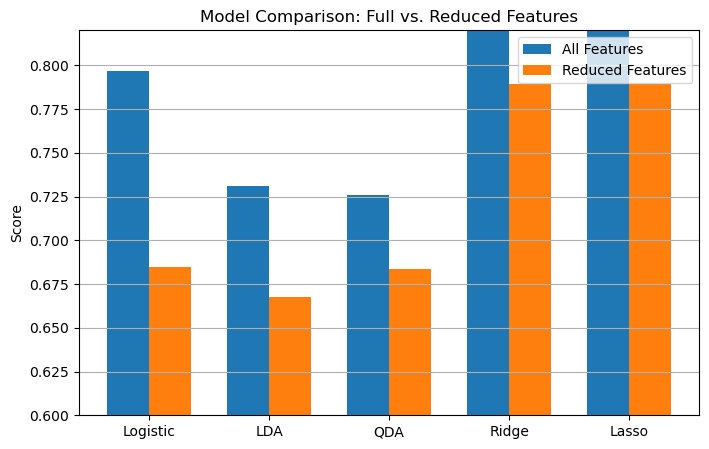

In [24]:
import numpy as np

models = ['Logistic', 'LDA', 'QDA', 'Ridge', 'Lasso']
full_scores = [0.7968, 0.7310, 0.7259, 1 - 0.1475, 1 - 0.1496]
reduced_scores = [0.6845, 0.6674, 0.6837, 1 - 0.2105, 1 - 0.2105]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, full_scores, width, label='All Features')
plt.bar(x + width/2, reduced_scores, width, label='Reduced Features')
plt.ylabel('Score')
plt.title('Model Comparison: Full vs. Reduced Features')
plt.xticks(x, models)
plt.ylim(0.6, 0.82)
plt.legend()
plt.grid(axis='y')
plt.show()


## **Effects of Feature Reduction on Model Performance**

### **Summary of Model Performance**
| Model | MSE / Accuracy (All Features) | MSE / Accuracy (Reduced Features) |
|--------|--------------------------|--------------------------|
| **Linear Regression** | **0.1476** (MSE) | **0.2105** (MSE) |
| **Logistic Regression** | **79.68%** | **68.45%** |
| **LDA** | **73.10%** | **66.74%** |
| **QDA** | **72.59%** | **68.37%** |
| **Ridge** | **0.1475** (MSE) | **0.2105** (MSE) |
| **Lasso** | **0.1496** (MSE) | **0.2105** (MSE) |

---

### **Main Insights**
1. **Linear Regression, Ridge, and Lasso Regression showed decreased performance following feature reduction**  
   - **MSE rose notably** with fewer predictors (from **0.1476** to **0.2105**).  
   - This indicates that **key features were excluded**, which compromised the model's accuracy.  
   - **Regularization methods (Ridge & Lasso) did not significantly mitigate** the increase in errors.

2. **Logistic Regression, LDA, and QDA also experienced a decline in accuracy**  
   - Logistic Regression's accuracy **fell from 79.68% to 68.45%**.  
   - LDA and QDA saw minor accuracy drops, suggesting that removing features impacted classification performance.

3. **QDA fared better with feature reduction compared to LDA and Logistic Regression**  
   - QDA **maintained an accuracy of 68.37%**, indicating its adaptability to a reduced feature space.  
   - This may be attributed to **its capacity to manage various covariance structures** effectively.

---

### **Analysis of Findings**
Reducing features hurt all models, which implies that the omitted variables contained significant information.
The significant rise in MSE indicates that linear models (Ridge, Lasso, and Linear Regression) are susceptible to feature selection.
- **Classification models (Logistic Regression, LDA, QDA) remained functional but at lower accuracy**, suggesting that some removed predictors were crucial for differentiating cancellations.

---

### **Concluding Remarks**
- **While reducing features can simplify models, it may also hinder accuracy.**
Lasso regression can still be advantageous for identifying essential predictors, but it should be applied judiciously.
Regularization methods (Ridge and Lasso) also experienced declines in performance, indicating that every predictor plays a valuable role.
Employing a feature selection process with Lasso or leveraging domain knowledge might enhance outcomes rather than utilizing random feature reduction.



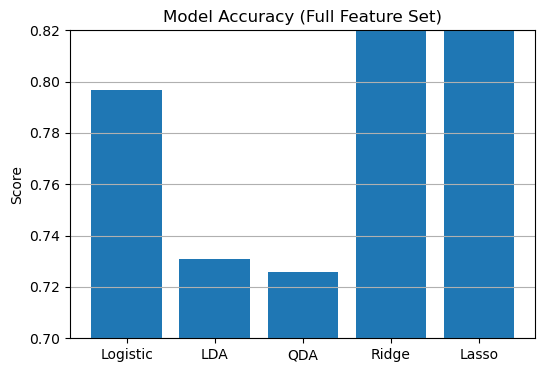

In [19]:
models = ['Logistic', 'LDA', 'QDA', 'Ridge', 'Lasso']
scores = [0.7968, 0.7310, 0.7259, 1 - 0.1475, 1 - 0.1496]  # Convert MSE to accuracy-like scale for visual comparison

plt.figure(figsize=(6, 4))
plt.bar(models, scores)
plt.title('Model Accuracy (Full Feature Set)')
plt.ylabel('Score')
plt.ylim(0.7, 0.82)
plt.grid(axis='y')
plt.show()


###  Model Performance Comparison (All Features)
We compare different models using either accuracy (for classifiers) or transformed 1 - MSE (for regression models) for a visual side-by-side view.


## Final Summary

- Logistic Regression (accuracy = 79.68%) was the most effective model
- Threshold tuning helped reduce overbooking risk
- LDA and QDA underperformed Logistic Regression
- Ridge and Lasso added value via regularisation and feature selection
- Reducing features led to worse performance across all models

**Recommendation**: Hotels should implement a Logistic Regression model with a 0.6 threshold for optimal balance between prediction accuracy and overbooking control.
